# Q2 Gradient Descent for Regression
by Jacob Williams
id 260400597
email jacob.williams@mail.mcgill.ca
for Applied Machine Learning - COMP 552

# 1.  Stochastic Gradient Descent Linear Fit
Will begin by loading data for a linear regression model (1 degree polynomial)

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.axes as mAxes
import pylab
from numpy.linalg import inv

TrnDf = pd.read_csv('Data\Dataset_2_train.csv',header=None, index_col=False)
TstDf = pd.read_csv('Data\Dataset_2_test.csv' ,header=None, index_col=False)
VldDf = pd.read_csv('Data\Dataset_2_valid.csv',header=None, index_col=False)

TrnDf = TrnDf.as_matrix()
TstDf = TstDf.as_matrix()
VldDf = VldDf.as_matrix()

Ytrn = TrnDf[:,1]
Ytst = TstDf[:,1]
Yvld = VldDf[:,1]

Xtrn = TrnDf[:,0]
Xtst = TstDf[:,0]
Xvld = VldDf[:,0]

#This equation will take a 1d input array, and will create a new
# array for a n-degree polynomial fit
def nDegExpansion(X, n):
    numrows = len(X)
    X_m = np.zeros((numrows, n+1)) #add 1 for constant term
    for r in range(numrows):
        for i in range(n+1): #add 1 for constant term
            X_m[r,i] = X[r,]**i
    return X_m

X_m_trn = nDegExpansion(Xtrn, 1)
X_m_tst = nDegExpansion(Xtst, 1)
X_m_vld = nDegExpansion(Xvld, 1)

### Utility Functions for Fitting Model
These functions will be used if you've totally looped through the data set due to having a high number of iterations.  This ensures you don't follow the same training path every iteration.

In [2]:
def batchify(l, n):
    #function to create even sized batches of size n
    batchLst = []
    for i in range(0, len(l), n):
        batchLst.append(l[i:i + n])
    return batchLst

      
def shuffleXY(X, Y):
    Y.reshape((len(X),1))

    XY = np.column_stack((X,Y))  #concatenate for 1d arrays
    Ys = XY[:,-1]
    Xs = XY[:,0:-1]
    return Xs, Ys

#equation to calculate MSE error
def errMSE(X, Y, W):
    prt1 = np.subtract(Y, np.dot(X,W))
    return np.dot(prt1.transpose(),prt1)
    
'''
function will take X, Y matrix to be fit, the step size aka learning rate,
the size of the batches, and the number of iterations to do sgd trainig.
Function also shuffles the input and data 
''' 
def sgdStepCalc(X, Y, W, stepSize):
    # dw = 2*(X.transpose*X*W-X.trans*Y)
    #Wi+1 = wi - alpha*dwi
    prt1 = np.dot(X.transpose(),X)
    prt1 = np.dot(prt1, W)

    prt2 = np.dot(X.transpose(),Y)

    dW = np.multiply(2, np.subtract(prt1, prt2))

    return np.subtract(W,  np.multiply(stepSize,dW))

### Utility Functions for Visualizing Models

In [3]:
#linear model will take an x position, and a weight matrix
# output an expected y value
#assisted by following stack overflow post
#https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
def linmdl(x, W):
    y=0
    for i in range(len(W)):
        y+=(x**i)*W[i]
    return y

#takes input x, y, and empty weight matrix and fills in the W matrix
#also prints out the predicted Y and W to csv files
def fitModel(X, Y):
    prt1 = inv(np.dot(X.transpose(), X))
    prt2 = np.dot(prt1, X.transpose())
    W = np.dot(prt2, Y)
    return W


#function to plot constructed linear model line, and data points
def plotLmPts(Xpts, Ypts, W, Title):
    minX = np.min(Xpts)
    maxX = np.amax(Xpts)
    
    Xlm = np.linspace(minX, maxX, 100)
    Ylm = np.zeros((Xlm.shape))
 
    for i in range(len(Xlm)):
        Ylm[i,] = linmdl(Xlm[i,], W)
    
    plt.plot(Xlm, Ylm,'r--', Xpts, Ypts, 'bs')
    plt.title(Title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

### Fitting the model

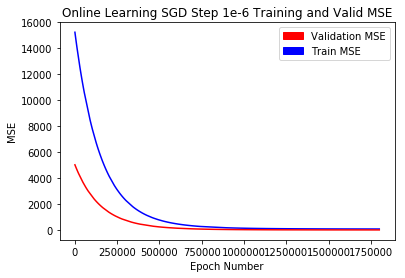

Final Weight Selection :  [ 3.9046155   3.41567758]


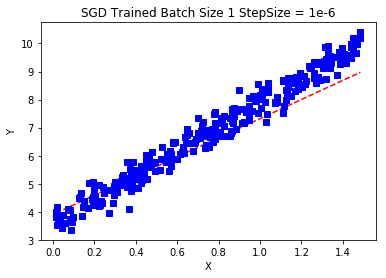

[ 3.9046155   3.41567758]
111.18542883


In [18]:
'''
function will take X, Y matrix and fit them using Stochastic Gradient Descent
and will plot the MSE of it and the validation data
-----Inputs
stepSize : Learning rate, amount to update W matrix at each step
btchSize : Number of data points in the learning update batches
itrtns : Number of times to loop through all of the data
'''        
def onlineSgdVldVis(Xtrn, Ytrn, Xvld, Yvld, lrnStep, its):
    numClms = Xtrn.shape[1]
    W = np.zeros((numClms,))
    trnMSE = []
    vldMSE = []
    epoch = 0
    
    for i in range(its):
        Xtrn, Ytrn = shuffleXY(Xtrn, Ytrn)
        for j in range(Xtrn.shape[0]):
            W = sgdStepCalc(Xtrn[j,:], Ytrn[j,], W, lrnStep)
            epoch+=1
            trnMSE.append(errMSE(Xtrn, Ytrn, W))
            vldMSE.append(errMSE(Xvld, Yvld, W))
    
    plt.title('Online Learning SGD Step 1e-6 Training and Valid MSE') 
    plt.xlabel('Epoch Number')
    plt.ylabel('MSE')
    plt.plot(range(epoch), trnMSE, 'b', range(epoch), vldMSE, 'r')
    #creating legend
    red_patch = mpatches.Patch(color='red', label='Validation MSE')
    blue_patch = mpatches.Patch(color='blue', label = 'Train MSE')
    plt.legend(handles=[red_patch, blue_patch])

    plt.show()
    print("Final Weight Selection : ", W)
    return W

stepsize = 1e-6
iterations = 20*X_m_trn.shape[0]

Wtrn = onlineSgdVldVis(X_m_trn, Ytrn, X_m_vld, Yvld, stepsize, iterations)
plotLmPts(Xtrn, Ytrn, Wtrn, "SGD Trained Batch Size 1 StepSize = 1e-6")
print(Wtrn)
print(errMSE(X_m_trn, Ytrn, Wtrn))        

## 2.  Step Size Selection
Step size selection isn't going to lead to a better MSE, since the best fit weights (minimum MSE) can be calculated in one shot with using all of the data at once.  Changing the learning step size should only change the time to reach this minimum MSE point.  Since the given data wasn't too large, we are able to calculate this minimum MS point in one shot.  Then we can judge different step sizes on how many epochs it takes to get within a set tolerance of the minimum MSE.

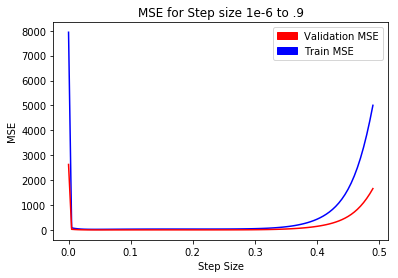

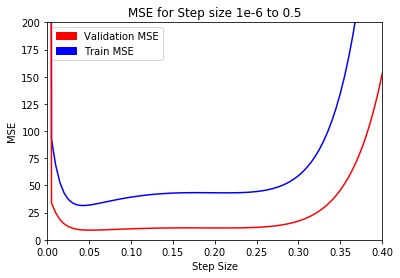

Test MSE of 0.05 SGD 31.9499226718 685.121618845


In [8]:
'''
This function will take traning, validation data, a given learning step, 
the maximum number of learning epochs, the minimumn MSE for the example,
and the the tolerance for being close enough to the mininum MSE point
to cease the SGD process

It will output the best fit W, it's MSE on validation data, and epoch at which
it was reached

'''
def onlineSgdStpTst(Xtrn, Ytrn, Xvld, Yvld, lrnStep, maxEpchs):
    numRows = Xtrn.shape[0]
    numClms = Xtrn.shape[1]
    W = np.zeros((numClms,))

    epoch = 0 
    epochMSE = float('inf')
    
    j = 0
    
    #and  epochMSE > (minMSE + tlrnce)
    while (epoch<maxEpchs):
        W = sgdStepCalc(Xtrn[j,:], Ytrn[j,], W, lrnStep)
    
        epoch+=1              
        #if the number of epochs is greater than the number of data points
        # must reset iterator to loop through data again
        if(j<numRows-1):
            j+=1
        else:
            j=0
    
    trnMSE = errMSE(Xtrn, Ytrn, W)
    vldMSE = errMSE(Xvld, Yvld, W)
            
    return W, trnMSE, vldMSE, epoch

def stpFndr(Xtrn, Ytrn, Xvld, Yvld, lrnDelta, lrnMin, lrnMax, maxEpchs):

    wLst = []
    TrnMseLst = []
    VldMseLst = []
    epchLst = []
    
    # building learning rate list
    lrnSteps = []
    numSteps = int((lrnMax - lrnMin)/lrnDelta)
    for i in range(numSteps):
        lrnStep = lrnMin+lrnDelta*i
        lrnSteps.append(lrnStep)
        
        iW, iTmse, iVmse, iEpch = onlineSgdStpTst(Xtrn, Ytrn, Xvld, Yvld, lrnStep, maxEpchs)
        
        wLst.append(iW)
        TrnMseLst.append(iTmse)
        VldMseLst.append(iVmse)
        epchLst.append(iEpch)
        
    plt.title('MSE for Step size 1e-6 to .9') 
    plt.xlabel('Step Size')
    plt.ylabel('MSE')
    plt.plot(lrnSteps, TrnMseLst, 'b', lrnSteps, VldMseLst, 'r')   
    
    #creating legend
    red_patch = mpatches.Patch(color='red', label='Validation MSE')
    blue_patch = mpatches.Patch(color='blue', label = 'Train MSE')
    plt.legend(handles=[red_patch, blue_patch])
    
    plt.show()
    
    plt.title('MSE for Step size 1e-6 to 0.5') 
    plt.xlabel('Step Size')
    plt.ylabel('MSE')
    plt.plot(lrnSteps, TrnMseLst, 'b', lrnSteps, VldMseLst, 'r')  
    plt.ylim(0, 200)
    plt.xlim(0.0, 0.4)
    
    #creating legend
    red_patch = mpatches.Patch(color='red', label='Validation MSE')
    blue_patch = mpatches.Patch(color='blue', label = 'Train MSE')
    plt.legend(handles=[red_patch, blue_patch])
    
    plt.show()
    
    return wLst, TrnMseLst, epchLst
#Xtrn, Ytrn, Xvld, Yvld, lrnDelta, lrnMin, lrnMax, maxEpchs 
wLst, mseTrnLst, epchLst = stpFndr(X_m_trn, Ytrn, X_m_vld, Yvld, 5e-3, 1e-6, .5, 1e6)

W, trnMSE, tstMSE, epoch = onlineSgdStpTst(X_m_trn, Ytrn, X_m_tst, Yvld, 0.05, 1e6)

print("Train and Test MSE of 0.05 SGD", trnMSE, tstMSE)


###  Selecting the Best Fit Line
So by looking at the graph of MSE vs Step Size, a value of around 0.6 seemed to give the best result so it should be selected?  No, because this low point of MSE was most likely reached by random chance from the stochastic gradient descent bouncing around.  We would like a stochastic gradient that evolves a bit more smoothly over time.  So will select a learning rate of 0.2 and will make sure to increase the number of epochs, and cross our fingers we don't get stuck in a saddle point of optimality

## 3. Visualizaing fits


### Visualizing Fit Development of learning step 0.05 

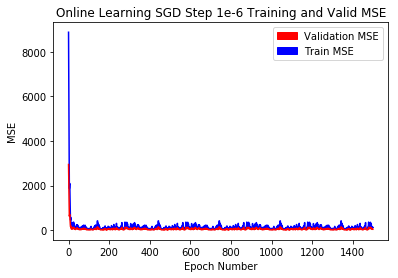

Final Weight Selection :  [ 3.93609976  3.35234927]


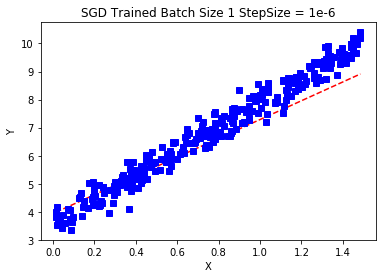

In [19]:
#onlineSgdVldVis(Xtrn, Ytrn, Xvld, Yvld, lrnStep, its):

stepsize = 0.05
iterations = 5


Wtrn = onlineSgdVldVis(X_m_trn, Ytrn, X_m_vld, Yvld, stepsize, iterations)
plotLmPts(Xtrn, Ytrn, Wtrn, "SGD Trained Batch Size 1 StepSize = 1e-6")

### Plotting utility  function from Q1

[ 3.57652222  4.32027406]


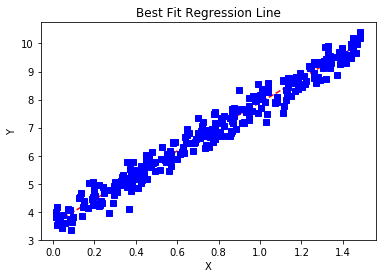

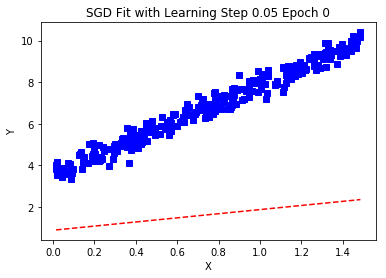

Fitted Weights :  [ 0.87552178  0.99315822] MSE error :  8870.46956282


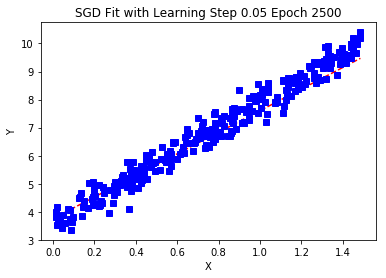

Fitted Weights :  [ 3.75582637  3.84992277] MSE error :  49.9976866158


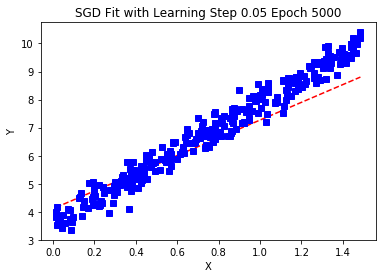

Fitted Weights :  [ 4.10877832  3.16136334] MSE error :  136.504117581


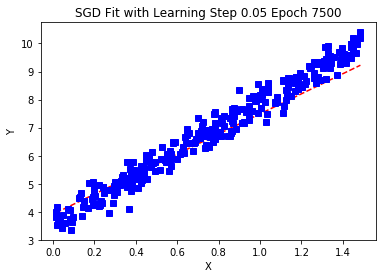

Fitted Weights :  [ 3.91152367  3.57890028] MSE error :  73.5469552299


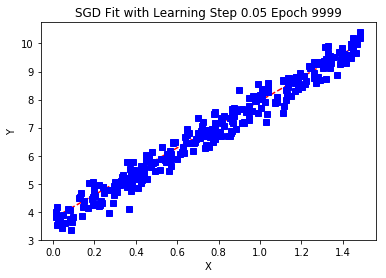

Fitted Weights :  [ 3.76423504  4.19333856] MSE error :  31.9499226718


In [6]:
def visDevlpMnt(X, X_m, Y, lrnStep, maxEpchs, numPlots):
    numRows = X_m.shape[0]
    numClms = X_m.shape[1]
    
    W = np.zeros((numClms,))
    
    visEpchs = []
    for i in range(numPlots):
        visEpchs.append(int(i*(maxEpchs/(numPlots-1))))
        
    visEpchs.append(maxEpchs-1)
    
    epoch = 0
    j=0
    while (epoch<maxEpchs):
        W = sgdStepCalc(X_m[j,:], Y[j,], W, lrnStep)
        
        if (epoch in visEpchs):
            title = "SGD Fit with Learning Step " + str(lrnStep)+ " Epoch " + str(epoch)
            plotLmPts(X, Y, W, title)
            print("Fitted Weights : ", W, "MSE error : " , errMSE(X_m, Y, W))
        
        epoch+=1
        #if the number of epochs is greater than the number of data points
        # must reset iterator to loop through data again
        if(j<numRows-1):
            j+=1
        else:
            j=0
            
minW = fitModel(X_m_trn, Ytrn)
print(minW)
plotLmPts(Xtrn, Ytrn, minW, "Best Fit Regression Line")
visDevlpMnt(Xtrn, X_m_trn, Ytrn, 0.05, 1e4, 5)
